In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
training_size = 1000
end_pos = []
j_config = []
for i in range(training_size):
  config = np.random.uniform(-np.pi,np.pi,3)
  t1, t2, t3 = config[0], config[1], config[2]
  c23 = (np.cos(t2)*np.cos(t3)) - (np.sin(t2)*np.sin(t3))
  s23 = (np.sin(t2)*np.cos(t3)) + (np.cos(t2)*np.sin(t3))
  end_x = (np.cos(t1)*c23) + (np.cos(t1)*np.cos(t2)) + np.cos(t1)
  end_y = (np.sin(t1)*s23) + (np.sin(t1)*np.cos(t2)) + np.sin(t1)
  end_z = s23 + np.sin(t2)
  end_pos.append(np.array([end_x,end_y,end_z]))
  j_config.append(np.array([t1, t2, t3]))
end_pos = np.asarray(end_pos)
j_config = np.asarray(j_config)

In [3]:
model = keras.Sequential()
model.add(layers.Dense(80, input_dim = 3, activation="relu", name="layer1"))
model.add(layers.Dense(3, name="output"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 80)                320       
                                                                 
 output (Dense)              (None, 3)                 243       
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='mse', optimizer='adam')

In [5]:
mf = model.fit(end_pos, j_config, epochs=150, verbose=0, validation_split=0.2)

In [6]:
K = 500
traj = np.zeros((K,3))
traj[:,0] = 2*np.cos(np.linspace(0,2*np.pi,num=K))
traj[:,1] = 2*np.sin(np.linspace(0,2*np.pi,num=K))
traj[:,2] = np.sin(np.linspace(0,8*np.pi,num=K))

In [7]:
mp = model.predict(traj)

In [8]:
def plot_loss(data):
  plt.plot(data.history['loss'], label='loss')
  plt.plot(data.history['val_loss'], label='val_loss')
  plt.ylim([2, 4])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

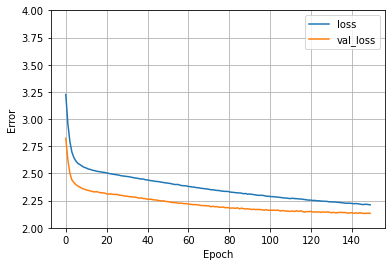

In [9]:
plot_loss(mf)

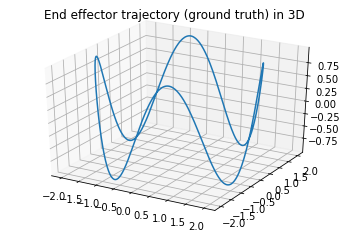

In [10]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
ax2.plot3D(traj[:,0],traj[:,1],traj[:,2])
ax2.set_title("End effector trajectory (ground truth) in 3D")

fig2.show()

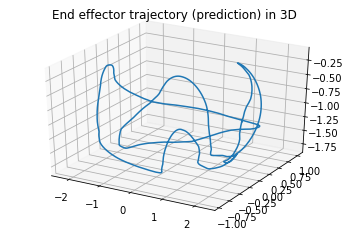

In [11]:
c23 = (np.cos(t2)*np.cos(t3)) - (np.sin(t2)*np.sin(t3))
s23 = (np.sin(t2)*np.cos(t3)) + (np.cos(t2)*np.sin(t3))
pred_end_pos = []
for m in mp:
  t1, t2, t3 = m[0], m[1], m[2]
  end_x = (np.cos(t1)*c23) + (np.cos(t1)*np.cos(t2)) + np.cos(t1)
  end_y = (np.sin(t1)*s23) + (np.sin(t1)*np.cos(t2)) + np.sin(t1)
  end_z = s23 + np.sin(t2)
  pred_end_pos.append(np.array([end_x, end_y, end_z]))
pred_end_pos = np.asarray(pred_end_pos)

fig = plt.figure()
ax = plt.axes(projection='3d')
x = pred_end_pos[:,0] 
y = pred_end_pos[:,1] 
z = pred_end_pos[:,2] 
ax.plot3D(x,y,z)
ax.set_title("End effector trajectory (prediction) in 3D")
fig.show()

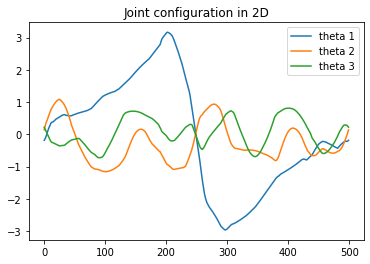

In [12]:
fig3 = plt.figure()
ax3 = plt.axes()
ax3.plot(mp[:,0],label='theta 1')
ax3.plot(mp[:,1],label='theta 2')
ax3.plot(mp[:,2],label='theta 3')
ax3.set_title("Joint configuration in 2D")
ax3.legend()
fig3.show()